【問題1】データセットの取得
====
pd.read_csv()を使用して、変数に格納してください。

EDAの行い方：
https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner

 download the txt file here: download

The notebook is organized as follows:

Part 0: Imports, Settings and switches, Global functions
import libraries
settings for number of cross validations
define functions that are used often

Part 1: Exploratory Data Analysis
1.1 Get an overview of the features (numerical and categorical) and first look on the target variable SalePrice
shape, info, head and describe
Distribution of the target variable SalePrice
Numerical and Categorical features
List of features with missing values and Filling missing values
log transform
1.2 Relation of all features to target SalePrice
Seaborn regression plots for numerical features
List of numerical features and their correlation coefficient to target
Seaborn boxplots for categorical features
List of categorical features and their unique values
1.3 Determine the columns that show strong correlation to target
Correlation matrix 1 : all numerical features
Determine features with largest correlation to SalePrice_Log

Part 2: Data wrangling
Dropping all columns with weak correlation to SalePrice
Convert categorical columns to numerical
Checking correlation to SalePrice for the new numerical columns
use only features with strong correlation to target
Correlation Matrix 2 (including converted categorical columns)
create datasets for ML algorithms
One Hot Encoder
StandardScaler

Part 3: Scikit-learn basic regression models and comparison of results
implement GridsearchCV with RMSE metric for Hyperparameter tuning
for these models from sklearn:
Linear Regression
Ridge
Lasso
Elastic Net
Stochastic Gradient Descent
DecisionTreeRegressor
Random Forest Regressor
KNN Regressor
baed on RMSE metric, compare performance of the regressors with their optimized parameters,
then explore correlation of the predictions and make submission with mean of best models
Comparison plot: RMSE of all models
Correlation of model results
Mean of best models

Note on scores:
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [18]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_df = pd.read_csv('./train.csv')

In [19]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


【問題2】データセット自体の調査
===
>KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

>本データセットは、アイオワ州のエイムズにある住宅価格を79の特徴量が格納されたデータセットである。
住宅購入者に彼らの夢の家を説明するように求め、彼らはおそらく、地下室の天井の高さや東西の鉄道への近接性で始まることはありません。しかし、この遊び場競争のデータセットは、ベッドルームの数や白板塀よりも価格交渉に影響を与えることを証明しています。
アイオワ州エイムズの住宅のほぼすべての側面を記述した79の説明変数で、この競争は各住宅の最終的な価格を予測することに挑戦しています。
```
データの種類は下記
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal:$Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
`````

【問題3】データの確認
----
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。
各特徴量がどういったものかを見る。（数値データか文字データなど）
今回の目的変数はどの列か確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [23]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


【問題4】欠損値への対応
===
欠損値に関して以下のことを行い、レポートしてください。
各特徴量の欠損値の有無を確認する。
欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。
ResidentMario/missingno: Missing data visualization module for Python.
欠損値が何パーセント含まれるかを確認する。


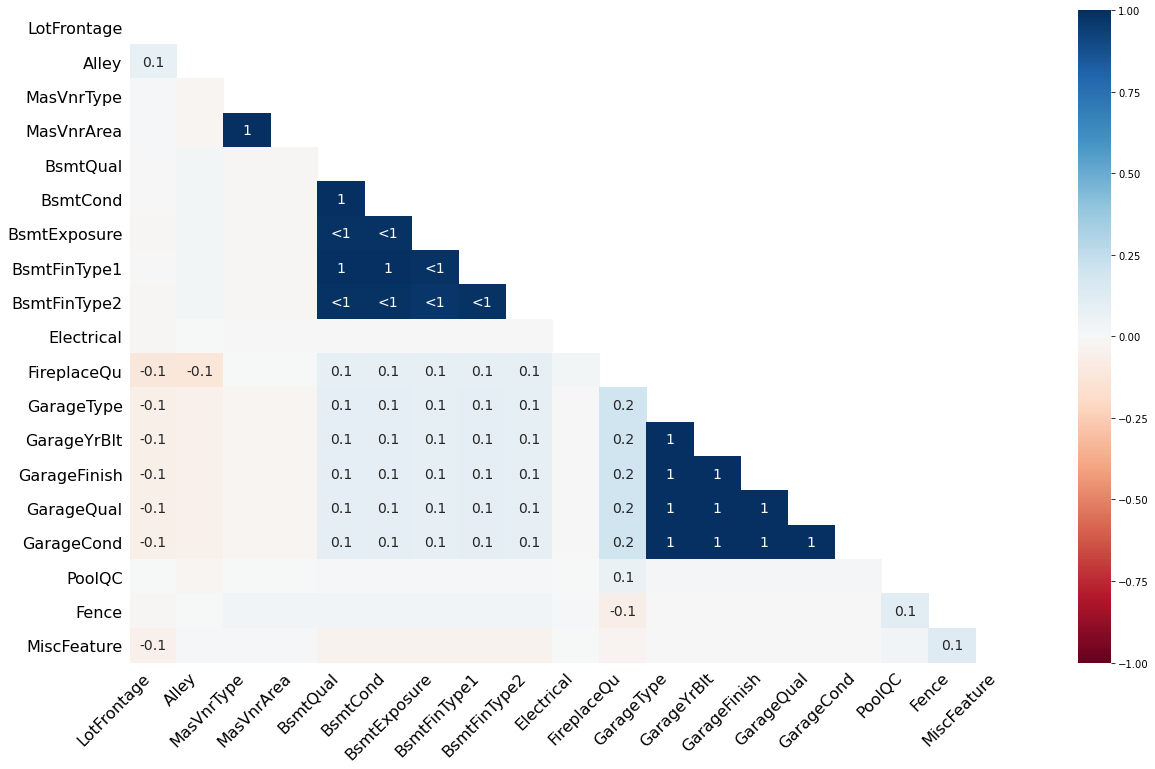

In [24]:
import missingno as msno
msno.heatmap(df)

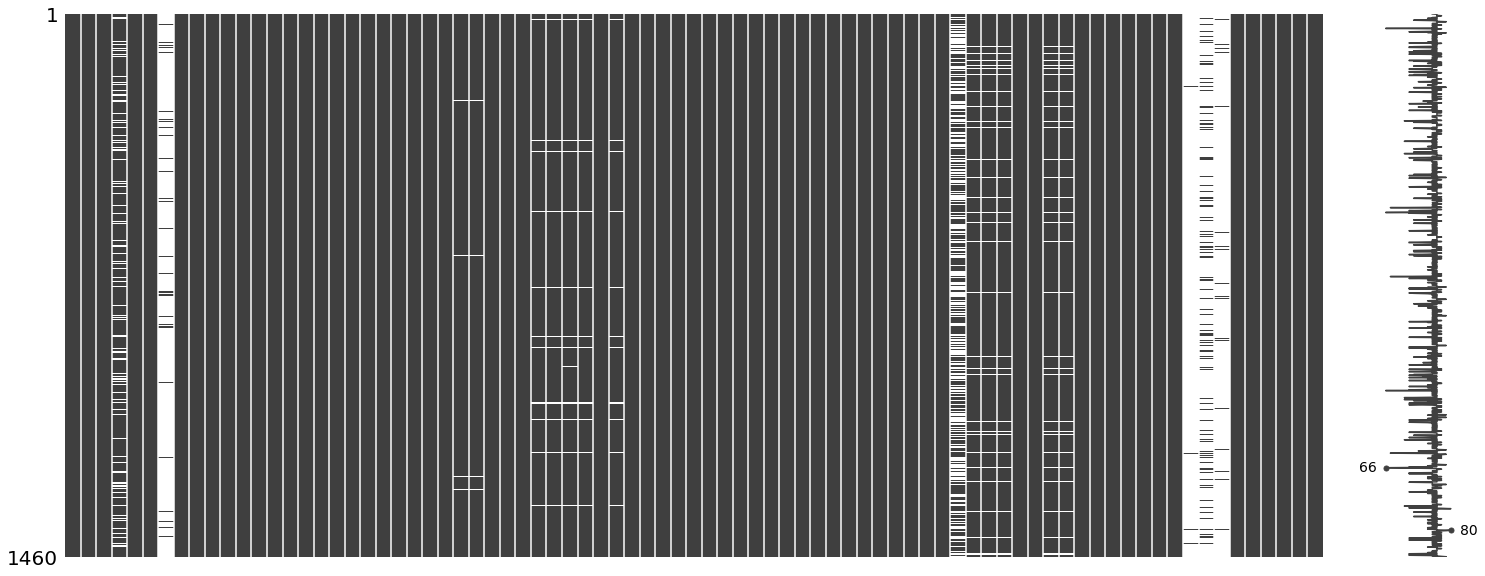

In [25]:
msno.matrix(df)

【問題5】用語の調査
----
以下の２つの単語を知る必要があります。これらを調査してまとめてください。


尖度
歪度

尖度
----
■尖度（せんど）
分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示します。サンプルサイズをn、各データの平均値を、標準偏差をsとすると尖度は次の式から求められます。
正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値をとります。正規分布の場合には0になります。
例えば、3-2章で用いた生徒の身長のデータ（一部改変）から尖度を算出すると次のようになります（※この図に示した尖度は、すべてのデータが階級値をとった場合の値です）
<img style="-webkit-user-select: none;margin: auto;cursor: zoom-in;background-color: hsl(0, 0%, 90%);transition: background-color 300ms;" src="https://bellcurve.jp/statistics/wp-body/wp-content/uploads/2018/01/2b530e80c7d0de90885e285c5d798063.png" width="1365" height="420">

歪度
----
■歪度（わいど）
>分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のことです。サンプルサイズをn、各データの平均値を、標準偏差をsとすると歪度は次の式から求められます。
「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとります。左右対称の分布（例えば正規分布）の場合には0になります。
例えば、3-2章で用いた生徒の身長のデータから歪度を算出すると次のようになります（※この図に示した歪度は、すべてのデータが階級値をとった場合の値です）。

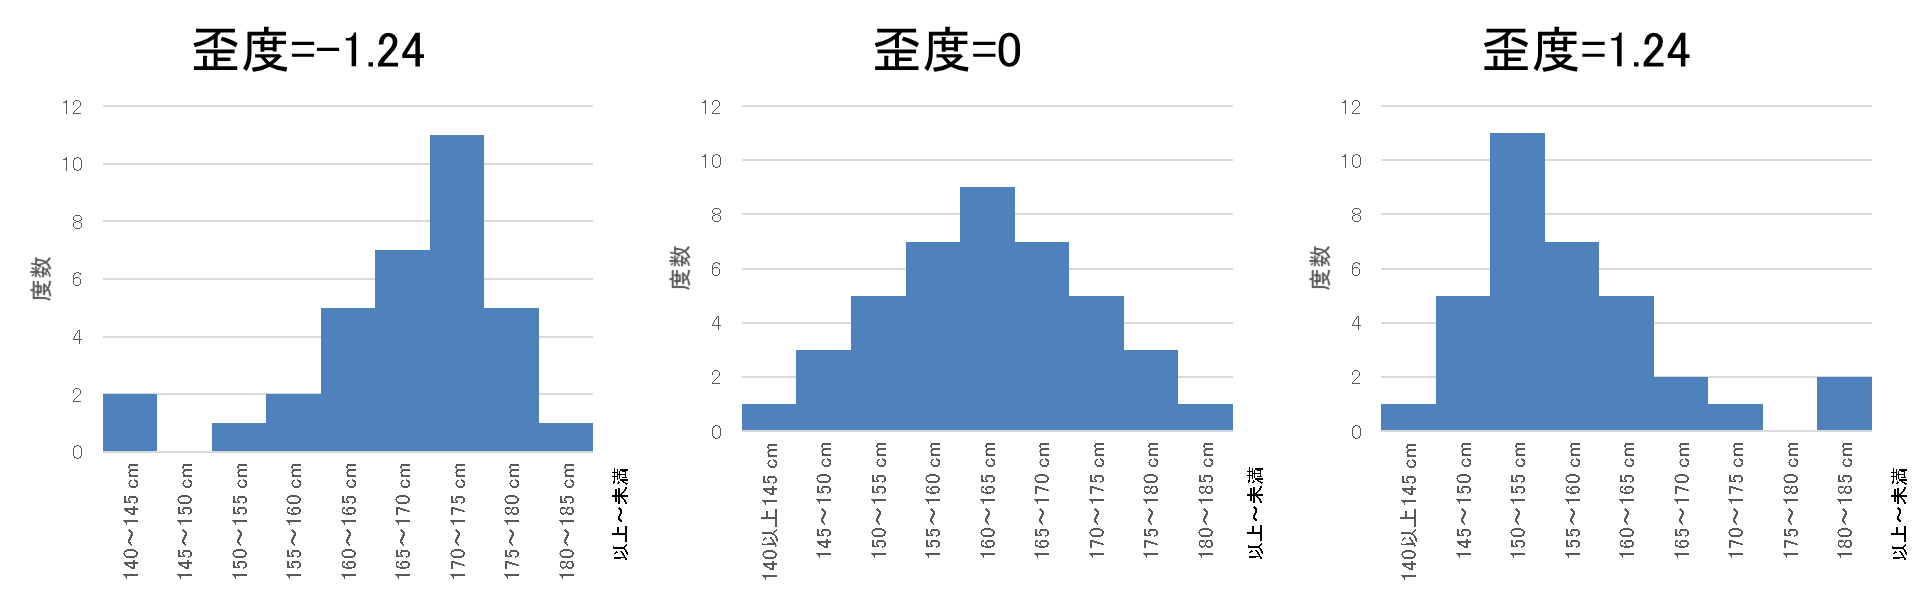

【問題6】分布の確認
----
seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
目的変数に対して対数変換を行う。
対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

```
sns.distplot(
    iris['sepal_width'], bins=13, color='#123456', label='data',
    kde=False,
    rug=False
)
plt.legend() # 凡例を表示
plt.show()   # ヒストグラムを表示
````

参考URL:

https://tanuhack.com/seaborn-histgram/



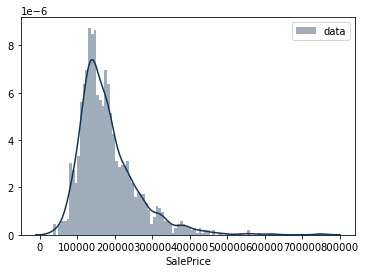

歪度(Skewness): 1.8828757597682129
尖度(Kurtosis): 6.536281860064529


In [38]:
sns.distplot(
    df['SalePrice'], bins=100, color='#123456', label='data',
    kde=True,
)
plt.legend() # 凡例を表示
plt.show()   # ヒストグラムを表示

print("歪度(Skewness):", df['SalePrice'].skew())
print("尖度(Kurtosis):", df['SalePrice'].kurt())

対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
---

参考URL:https://note.nkmk.me/python-pandas-map-applymap-apply/

In [39]:
df_salesprice_log = np.log(df['SalePrice'])

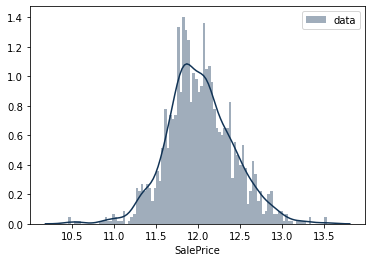

歪度(Skewness): 0.12133506220520406
尖度(Kurtosis): 0.8095319958036296


In [40]:
sns.distplot(
    df_salesprice_log, bins=100, color='#123456', label='data',
    kde=True,
)
plt.legend() # 凡例を表示
plt.show()   # ヒストグラムを表示

print("歪度(Skewness):", df_salesprice_log.skew())
print("尖度(Kurtosis):", df_salesprice_log.kurt())

対数変換することで、より正規分に値が近づいた。その結果、統計的な分析を行う際に比較検討しやすい形となった。

【問題7】相関係数の確認
=====
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

#【問題7】相関係数の確認
相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

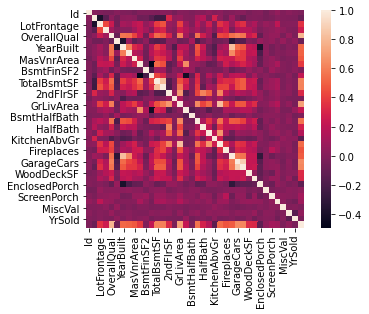

In [42]:
sns.heatmap(df.corr(), square=True)

In [50]:
df_corr = df.corr()
df_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


値に基づいてソートする
---
sort_values() メソッドを利用して、データフレームを値に基づいて並び替えを行うことができます。

In [49]:
df_corr.sort_values(by='SalePrice', ascending=False)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


相関係数を１列で示す
---

# 引数は、相関係数を作成したいdf
def calc_corr(df):
    # 相関係数行列を作成
    corr_mat = df.corr(method='pearson')

    # 行（列）サイズを取得
    n = corr_mat.shape[0]

    # 項目名を取得
    columns = corr_mat.columns.tolist()

    # 変数名1, 変数名2, 値を一つの配列に入れたものを作成
    # 相関係数行列の下三角部分（対角成分除く）だけ
    corr_ary = []
    var1_ary = []
    var2_ary = []
    for i in range(n):
        for j in range(i):
            if i == j:
                continue
            corr_ary.append(corr_mat.iloc[i,j])
            var1_ary.append(columns[i])
            var2_ary.append(columns[j])

    # dfにする
    df_new = pd.DataFrame([])
    df_new["var1"] = var1_ary
    df_new["var2"] = var2_ary
    df_new["corr"] = corr_ary

    return df_new

In [95]:
def calc_corr(df):
    # 相関係数行列を作成
    df_corr_salesprice = df.corr(method='pearson')

    # 行（列）サイズを取得
    n = df_corr_salesprice.shape[0]

    # 項目名を取得
    columns = df_corr_salesprice.columns.tolist()

    # 変数名1, 変数名2, 値を一つの配列に入れたものを作成
    # 相関係数行列の下三角部分（対角成分除く）だけ
    corr_ary = []
    var1_ary = []
    var2_ary = []
    for i in range(n):
        for j in range(i):
            if i == j:
                continue
            corr_ary.append(df_corr_salesprice.iloc[i,j])
            var1_ary.append(columns[i])
            var2_ary.append(columns[j])

    # dfにする
    df_new = pd.DataFrame([])
    df_new["var1"] = var1_ary
    df_new["var2"] = var2_ary
    df_new["corr"] = corr_ary

    return df_new
top_10_df_corr = calc_corr(df_corr).sort_values(by='corr', ascending=False)

In [96]:
top_10_df_corr_salesprice = top_10_df_corr.query('var1 == "SalePrice"')

In [98]:
top_10_df_corr_salesprice.head(10)

,var1,var2,corr
670,SalePrice,OverallQual,0.962500
692,SalePrice,GarageCars,0.903554
693,SalePrice,GarageArea,0.900257
678,SalePrice,TotalBsmtSF,0.817396
682,SalePrice,GrLivArea,0.814702
685,SalePrice,FullBath,0.811329
674,SalePrice,MasVnrArea,0.807608
679,SalePrice,1stFlrSF,0.797333
672,SalePrice,YearBuilt,0.785608
673,SalePrice,YearRemodAdd,0.762841


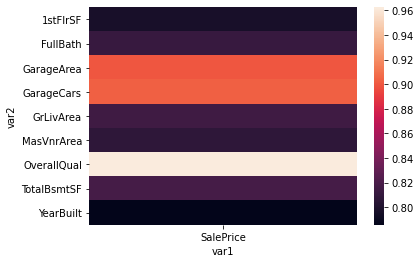

In [85]:
#ピポッドテーブルを作成
top_10_corr = top_10_df_corr_salesprice.pivot("var2", "var1", "corr")
#ヒートマップの作成
sns.heatmap(top_10_corr)

考察
----
相関係数高い値は、
670	SalePrice	OverallQual	0.962500
692	SalePrice	GarageCars	0.903554
693	SalePrice	GarageArea	0.900257
である。
目的変数ともっとも相関が高いのはOverallQual(家の仕上がり、材料の評価)であり、次に高いのはGarageCars(車用のガレージがあるか)とGarageArea(車庫の広さ)となっています。
オハイオ州での家の価格は、家の仕上がり、ガレージの有無とその広さに関係している。

任意の値のみ抽出して相関係数の総当りを行う。
---
任意の列のみ入れるデータフレームを作る
````
>>> df.loc[:,['A','B']]
````

In [108]:
df_top10_feature = df.loc[:, ['OverallQual','GarageCars','GarageArea','TotalBsmtSF','GrLivArea','FullBath','MasVnrArea','1stFlrSF','YearBuilt','YearRemodAdd']]
df_top10_feature.corr()

,OverallQual,GarageCars,GarageArea,TotalBsmtSF,GrLivArea,FullBath,MasVnrArea,1stFlrSF,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.600671,0.562022,0.537808,0.593007,0.550600,0.411876,0.476224,0.572323,0.550684
GarageCars,0.600671,1.000000,0.882475,0.434585,0.467247,0.469672,0.364204,0.439317,0.537850,0.420622
GarageArea,0.562022,0.882475,1.000000,0.486665,0.468997,0.405656,0.373066,0.489782,0.478954,0.371600
TotalBsmtSF,0.537808,0.434585,0.486665,1.000000,0.454868,0.323722,0.363936,0.819530,0.391452,0.291066
GrLivArea,0.593007,0.467247,0.468997,0.454868,1.000000,0.630012,0.390857,0.566024,0.199010,0.287389
FullBath,0.550600,0.469672,0.405656,0.323722,0.630012,1.000000,0.276833,0.380637,0.468271,0.439046
MasVnrArea,0.411876,0.364204,0.373066,0.363936,0.390857,0.276833,1.000000,0.344501,0.315707,0.179618
1stFlrSF,0.476224,0.439317,0.489782,0.819530,0.566024,0.380637,0.344501,1.000000,0.281986,0.240379
YearBuilt,0.572323,0.537850,0.478954,0.391452,0.199010,0.468271,0.315707,0.281986,1.000000,0.592855
YearRemodAdd,0.550684,0.420622,0.371600,0.291066,0.287389,0.439046,0.179618,0.240379,0.592855,1.000000


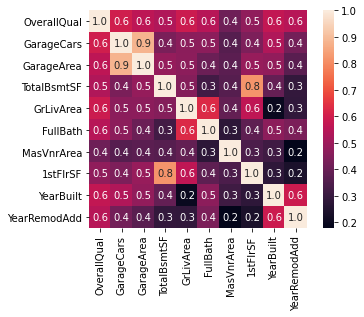

In [110]:
sns.heatmap(df_top10_feature.corr(), square=True, annot=True, fmt="1.1f")

販売価格と相関が多いも同士の相関の関係性を見た。
---
多重共線性が高いものは下記と考えられて、重回帰分析を行う場合はどちらか一つの値にしぼり変数としていれるべきである。

- ①ガレージエリアとガレージの有無

- ②TotalBsmtsFと1stfirstSF
地下部分の大きさと１回の広さ

TotalBsmtSF: Total square feet of basement area
1stFlrSF: First Floor square feet


- ③yearbulitとyear remond add
建設した年と回収した年
YearBuilt: Original construction date
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
